<a href="https://colab.research.google.com/github/chaitanyamhaiskar/Data-Analysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/ML+04+Clustering+Datset.csv')
df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian wheat


In [3]:
from tabulate import tabulate
def basicDataInfo(df):
    # Display the first 5 rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the last 5 rows of the DataFrame
    print("Last 5 rows of the DataFrame:")
    print(tabulate(df.tail(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the shape of the DataFrame (number of rows and columns)
    shape_info = pd.DataFrame({"Number of Rows": [df.shape[0]], "Number of Columns": [df.shape[1]]})
    print("DataFrame shape:")
    print(tabulate(shape_info, headers='keys', tablefmt='rounded_outline'))

    #Display the null values if present:
    missing_values_info = df.isna().sum().to_frame(name="Number of Missing Values")
    print("Missing Values Summary:")
    print(tabulate(missing_values_info, headers='keys', tablefmt='rounded_outline'))

    # Display the number of duplicated rows in the DataFrame
    num_duplicates = df.duplicated().sum()
    tab = pd.DataFrame({'Duplicate Values':[num_duplicates]})
    print(tabulate(tab,headers='keys',tablefmt = 'rounded_outline'))


    # Display Nunique() values:
    nunique_vals = df.nunique().reset_index()
    nunique_vals.columns = ['Column', 'UniqueCount']
    # Display the number of unique values for each column
    print("Number of Unique Values per Column:")
    print(tabulate(nunique_vals, headers='keys', tablefmt='rounded_outline'))
    print()

    # Display Data Types()
    info = df.dtypes.reset_index()
    info.columns = ['Column','Data Type']
    print('Data types -> ')
    print(tabulate(info,headers = 'keys',tablefmt='rounded_outline'))
    print(df.dtypes.value_counts())

    # Describe function
    des = df.describe()
    print('Aggregate Values of The Data Set')
    print(tabulate(des,headers = 'keys',tablefmt = 'rounded_outline'))
    print()

In [4]:
basicDataInfo(df)

First 5 rows of the DataFrame:
╭────┬────────┬─────────────┬───────────────┬──────────┬─────────┬─────────────────────────┬─────────────────┬─────────────────╮
│    │   area │   perimeter │   compactness │   length │   width │   asymmetry_coefficient │   groove_length │ grain_variety   │
├────┼────────┼─────────────┼───────────────┼──────────┼─────────┼─────────────────────────┼─────────────────┼─────────────────┤
│  0 │  15.26 │       14.84 │        0.871  │    5.763 │   3.312 │                   2.221 │           5.22  │ Kama wheat      │
│  1 │  14.88 │       14.57 │        0.8811 │    5.554 │   3.333 │                   1.018 │           4.956 │ Kama wheat      │
│  2 │  14.29 │       14.09 │        0.905  │    5.291 │   3.337 │                   2.699 │           4.825 │ Kama wheat      │
│  3 │  13.84 │       13.94 │        0.8955 │    5.324 │   3.379 │                   2.259 │           4.805 │ Kama wheat      │
│  4 │  16.14 │       14.99 │        0.9034 │    5.658 │   3.562 │

In [6]:
x = df.drop('grain_variety',axis = 1)
y = df.grain_variety


In [9]:
df.corr(numeric_only=True)
px.imshow(df.corr(numeric_only=True),text_auto=True,aspect='auto',title='Correlation Matrix',color_continuous_scale='RdBu')

In [10]:
def find_outliers_IQR(df):
	outlier_indices = []
	df = df.select_dtypes(include = 'number')
	for col in df.columns:
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3-Q1
		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		outlier_list_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
		outlier_indices.extend(outlier_list_col)

	outlier_indices = list(set(outlier_indices))
	return df.iloc[outlier_indices]

In [16]:
find_outliers_IQR(df)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length


In [12]:
def outlierFinder(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print('lower bound ->',lower_bound)
    print('upper bound ->',upper_bound)
    print('IQR->',IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f'{len(outliers)} outliers found.')
        while True:
            ch = input('Do you want to cap the outliers (yes/no)? ').strip().lower()
            if ch == 'yes':
                df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))
                print(f'Outliers in {col} have been capped.')
                break

            elif ch == 'no':
                print('Outliers not capped.')
                break
            else:
                print("Please enter 'yes' or 'no'.")
    else:
        print('No outliers found.')
    return df

In [15]:
outlierFinder(df,'compactness')
outlierFinder(df,'asymmetry_coefficient')

lower bound -> -0.7493749999999992
upper bound -> 8.079625
IQR-> 2.2072499999999997
2 outliers found.
Do you want to cap the outliers (yes/no)? yes
Outliers in asymmetry_coefficient have been capped.


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221000,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018000,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699000,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259000,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355000,5.175,Kama wheat
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631000,4.870,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325000,5.003,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.079625,5.056,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598000,5.044,Canadian wheat


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(x)


In [18]:
from sklearn.cluster import KMeans
num_of_cluster = range(1,10)
wcss = []
for i in num_of_cluster:
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)


In [19]:
wcss

[1470.0000000000005,
 659.1717544870406,
 430.6589731513006,
 371.58119097155236,
 326.3061827611606,
 289.9841260630783,
 262.3496758683565,
 240.32361259444173,
 222.40079811171677]

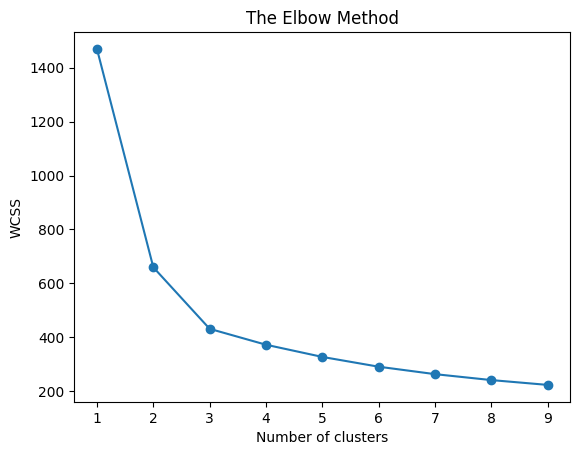

In [20]:
import matplotlib.pyplot as plt
plt.plot(num_of_cluster,wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
model = KMeans(n_clusters=3,init='k-means++',random_state=42)
labels = model.fit_predict(scaled)
print(labels)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]


In [22]:
target = df['grain_variety']
cf = pd.DataFrame({'labels':labels,'Target':target})
cross_tab = pd.crosstab(cf['labels'],cf['Target'])
cross_tab


Target,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,2,65
1,66,6,0
2,4,62,5


In [24]:
from sklearn.metrics import silhouette_score
num_of_cluster = list(range(2,8))
shc_list = []
for k in num_of_cluster:
    # create a KMeans instance with k cluster
    model = KMeans(n_clusters=k, random_state=15)
    # build the model using the data and predict the cluster
    cluster_labels= model.fit_predict(scaled)
    shc_list.append(silhouette_score(scaled,cluster_labels))

In [25]:
shc_list

[0.46577247686580914,
 0.40072705527512986,
 0.32757426605518075,
 0.2881466510357611,
 0.277525879555176,
 0.2658418662036843]

In [28]:
num_of_cluster.insert(0,1)
shc_list.insert(0,0)

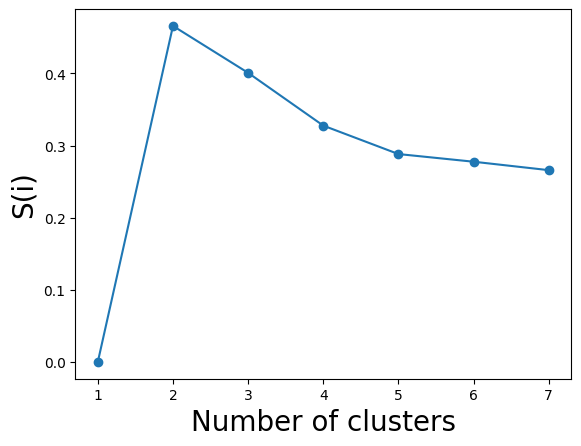

In [29]:
plt.plot(num_of_cluster,shc_list,'-o')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [32]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(scaled,color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
2*"3"

'33'

In [ ]:
for a in "Python":
  if a !='t': pass
  print(a,end=",")

P,y,t,h,o,n,

In [ ]:
x=121
int(not((120.5 < x or 11**2==x) and (x%11==0 and x/11==11)))

0

In [ ]:
_python = 1
_python

1

In [ ]:
lst1=[-2,-3,-4]
lst2=[-3,-4,-5]
lst1>lst2

True

In [ ]:
3*'home'

'homehomehome'

In [ ]:
for n in range(1,8,1):
  print(n,end=",")

1,2,3,4,5,6,7,

In [ ]:
sentence="sun rises in the east"
for l in sentence.split():
    print(l,end="-")

sun-rises-in-the-east-

In [ ]:
not(5==(45/15) and 6>5.99 and 7>100)

True

In [ ]:
count=0
for j in range(10):
  for i in range(5):
    for k in range(1,-1,-1):
      count+=1
print(count)

100


In [ ]:
a,b=6,7
if b%a:
  print('True')
else: print('False')

True


In [ ]:
print(000, 10,000)

0 10 0


In [ ]:
count=0
for j in range(-10,-1,1):
  for i in range(5):
    count+=1
print(count)

45


In [ ]:
10>5 and 5>2<4 and 9%2==4

False

In [ ]:
import random
print(random.randint(1,10))

10


In [ ]:
def sum (a,b,c=50):
  add=a+b+c
  print(add)
sum(5,6,)

61


In [ ]:
def find_char(data,char):
  cnt = 0
  for ele in data:
    if ele == char:
      cnt += 1
  return cnt
data = {'a':1,'b':2}
print(find_char(data,'a'))

1


In [ ]:
import copy
var1 = [1,2,3]
var2 = [4,5,6]
var1.append(var2)
var1

[1, 2, 3, [4, 5, 6]]

In [ ]:
var3 = copy.copy(var1)
var4 = copy.deepcopy(var1)
print(var3)
print(var4)

[1, 2, 3, [4, 5, 6]]
[1, 2, 3, [4, 5, 6]]


In [ ]:
var2.append(7)
var4[3].append(8)
print(var3[3][3])

7


In [ ]:
var3

[1, 2, 3, [4, 5, 6, 7, 7]]

In [ ]:
var4[3][3]

8